<a href="https://colab.research.google.com/github/BudiAtu/skripsi-cnn-chili/blob/main/skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Install TensorFlow 2.2

In [1]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 3.9 kB/s 
     |████████████████████████████████| 454 kB 68.8 MB/s 
     |████████████████████████████████| 2.9 MB 54.9 MB/s 
     |████████████████████████████████| 3.0 MB 56.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [2]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow Version :", tf.__version__)
print("Keras Version      :", keras.__version__)

TensorFlow Version : 2.2.0
Keras Version      : 2.3.0-tf


In [4]:
import os
fold_virus_kerupuk = os.path.join('/content/drive/MyDrive/dataset/virus kerupuk')
fold_daun_sehat = os.path.join('/content/drive/MyDrive/dataset/daun sehat')
fold_virus_gemini = os.path.join('/content/drive/MyDrive/dataset/virus gemini')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Virus Kerupuk :', len(os.listdir(fold_virus_kerupuk)))
print('Jumlah gambar daun sehat  :', len(os.listdir(fold_daun_sehat)))
print('Jumlah gambar virus gemini :', len(os.listdir(fold_virus_gemini)))

print("\nMenampilkan file gambar")
file_virus_kerupuk = os.listdir(fold_virus_kerupuk)
print("virus kerupuk:", file_virus_kerupuk[:3])

file_daun_sehat = os.listdir(fold_daun_sehat)
print("daun sehat:", file_daun_sehat[:3])

file_virus_gemini = os.listdir(fold_virus_gemini)
print("Virus gemini :", file_virus_gemini[:3])

Jumlah Data Train Tiap Kelas
Jumlah gambar Virus Kerupuk : 150
Jumlah gambar daun sehat  : 200
Jumlah gambar virus gemini : 200

Menampilkan file gambar
virus kerupuk: ['K01.JPG', 'K02.JPG', 'K03.JPG']
daun sehat: ['S02.jpg', 'S01.jpg', 'S03.jpg']
Virus gemini : ['G01.JPG', 'G02.JPG', 'G03.JPG']


In [5]:
os.mkdir('/tmp/dataset/')
os.mkdir('/tmp/dataset/train/')
os.mkdir('/tmp/dataset/test/')
os.mkdir('/tmp/dataset/train/virus kerupuk/')
os.mkdir('/tmp/dataset/test/virus kerupuk/')
os.mkdir('/tmp/dataset/train/daun sehat/')
os.mkdir('/tmp/dataset/test/daun sehat/')
os.mkdir('/tmp/dataset/train/virus gemini/')
os.mkdir('/tmp/dataset/test/virus gemini/')

In [6]:
import random
from shutil import copyfile

def train_val_split(source, train, test, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  test_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  test_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

train_ratio = 0.8
#Pembagian Training dan Test

source_00 = '/content/drive/MyDrive/dataset/virus kerupuk/'
train_00 = '/tmp/dataset/train/virus kerupuk/'
test_00 = '/tmp/dataset/test/virus kerupuk/'
train_val_split(source_00, train_00, test_00, train_ratio)

source_01 = '/content/drive/MyDrive/dataset/daun sehat/'
train_01 = '/tmp/dataset/train/daun sehat/'
test_01 = '/tmp/dataset/test/daun sehat/'
train_val_split(source_01, train_01, test_01, train_ratio)

source_02 = '/content/drive/MyDrive/dataset/virus gemini/'
train_02 = '/tmp/dataset/train/virus gemini/'
test_02 = '/tmp/dataset/test/virus gemini/'
train_val_split(source_02, train_02, test_02, train_ratio)


2. PRAPROSES DATASET

2-1. UBAH DATA MENJADI ARRAY

In [7]:
import os
import cv2
import random
import numpy as np

img_size_224p = 128 # ⚠️Can be Customized⚠️ If use 224 pixels, it will be Out of Memory (OOM)

path_train  = '/tmp/dataset/train/'
path_test   = '/tmp/dataset/test/'
categories  = ['daun sehat', 'virus gemini', 'virus kerupuk']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Take the Label as the Index
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

2-2. Get Features (X) & Labels (y)

In [8]:
# X for Features & y for Labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

# -1 in reshape, means to let Numpy define the appropriate data dimensions
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (440, 128, 128, 3)
y_train : (440,)
X_test  : (110, 128, 128, 3)
y_test  : (110,)


2-3. FEATURES (X) : NORMALIZATION

In [9]:
print("Array of X_train :\n\n", X_train[0]) # Take the first data for example
print("\nArray of X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize (feature scaling) to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nArray of X_train_norm :\n\n", X_train_norm[0])
print("\nArray of X_test_norm  :\n\n", X_test_norm[0])

Array of X_train :

 [[[210 229 186]
  [197 219 178]
  [164 183 154]
  ...
  [ 75  68  76]
  [ 78  71  79]
  [ 72  65  73]]

 [[192 218 173]
  [209 238 193]
  [189 214 177]
  ...
  [ 80  73  81]
  [ 83  76  84]
  [ 71  64  72]]

 [[179 207 164]
  [200 232 186]
  [194 224 183]
  ...
  [ 76  69  77]
  [ 79  73  80]
  [ 77  71  78]]

 ...

 [[136 176 127]
  [146 190 112]
  [115 158  87]
  ...
  [166 193 147]
  [133 173 110]
  [128 169 100]]

 [[141 178 130]
  [159 198 136]
  [165 203 146]
  ...
  [157 183 138]
  [148 187 131]
  [127 167 105]]

 [[148 181 134]
  [161 192 150]
  [173 203 165]
  ...
  [172 199 150]
  [149 187 136]
  [126 165 109]]]

Array of X_test  :

 [[[ 83 117  93]
  [ 77 108  95]
  [ 47  75  83]
  ...
  [ 60 103  56]
  [ 59 100  60]
  [ 59 101  55]]

 [[ 85 122  80]
  [ 77 113  80]
  [ 70 103  84]
  ...
  [ 66 109  59]
  [ 60 101  57]
  [ 62 102  57]]

 [[ 76 115  62]
  [ 74 112  63]
  [ 72 109  66]
  ...
  [ 58 104  49]
  [ 57 101  52]
  [ 67 106  59]]

 ...

 [[129 10

2-4. LABELS (y) : ONE HOT ENCODING

In [10]:
from tensorflow.keras.utils import to_categorical

print("Array of y_train :", y_train)
print("Array of y_test  :", y_test)

# One Hot Encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nArray of y_train_encode :\n\n", y_train_encode)
print("\nArray of y_test_encode :\n\n", y_test_encode)

Array of y_train : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Array of y_test  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

2-5. PLOT/TAMPILKAN DATASET

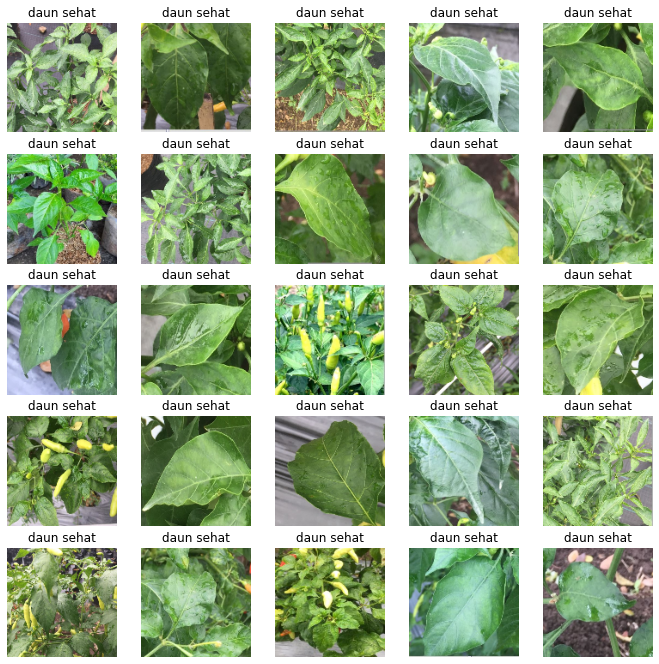

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5 # ⚠️Can be Customized⚠️
ncols = 5 # ⚠️Can be Customized⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))    
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show Features/images
        if y_train[temp] == 0:
            judul = "daun sehat"
        elif y_train[temp] == 1:
            judul = "virus gemini"
        elif y_train[temp] == 2:
            judul = "virus kerupuk"

            
        ax[i,j].set_title(judul)        # Show Labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

2-6. BERSIHKAN USELESS DATA (RAM CLEANER)

In [ ]:
import gc     # Gabage Collector for cleaning deleted data from memory

del dataTrain
del dataTest
del X_train
del X_test
#del y_train  # Used later for Confusion Matrix
#del y_test   # Used later for Confusion Matrix

gc.collect()

48633

2-7. DATA FINAL YANG AKAN DIGUNAKAN

In [12]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (440, 128, 128, 3)
y_train_encode   : (440, 3)
X_test_norm      : (110, 128, 128, 3)
y_test_encode    : (110, 3)


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [15]:
train_dir = '/tmp/dataset/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 10,
    class_mode = 'categorical'
)

val_dir = '/tmp/dataset/test/'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (128, 128),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 440 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


3. BANGUN ARSITEKTUR

3-1. ARSITEKTUR MOBILENETV2

3-2. ARSITEKTUR CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

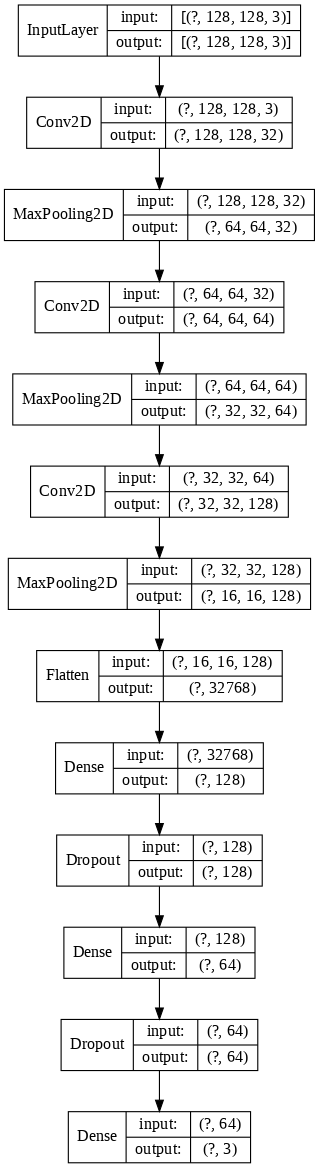

In [16]:
# Referensi Arsitektur: https://www.tensorflow.org/tutorials/images/classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def define_model_kustom():
    model = Sequential()

      # 01-Feature Extractor Layer
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(img_size_224p, img_size_224p, 3))) # ⚠️ Sesuaikan Input Shape
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 02-Flatten Layer
    model.add(Flatten())
    
    # 03-Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(3, activation='softmax'))
    
    # Compile Model
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_kustom()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

4. TRAINING DENGAN K-FOLD

4-1. TRAINING UNTUK 5 FOLDS

In [ ]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x)

Training tanpa fold

In [17]:
%%time

import pandas as pd

epochs = 50       # ⚠️ SESUAIKAN ⚠️
batch_size = 10   # ⚠️ SESUAIKAN ⚠️

model = define_model_kustom() 

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
history = model.fit(train_generator, validation_data = val_generator, epochs=epochs, batch_size=batch_size, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
44/44 [==============================] - 38s 864ms/step - loss: 1.1041 - accuracy: 0.3614 - val_loss: 1.0666 - val_accuracy: 0.5182
Epoch 2/50
44/44 [==============================] - 38s 855ms/step - loss: 1.0103 - accuracy: 0.4705 - val_loss: 0.7919 - val_accuracy: 0.5364
Epoch 3/50
44/44 [==============================] - 38s 857ms/step - loss: 0.9264 - accuracy: 0.5500 - val_loss: 0.7516 - val_accuracy: 0.6636
Epoch 4/50
44/44 [==============================] - 38s 857ms/step - loss: 0.8723 - accuracy: 0.6068 - val_loss: 0.6713 - val_accuracy: 0.7545
Epoch 5/50
44/44 [==============================] - 38s 855ms/step - loss: 0.8246 - accuracy: 0.5977 - val_loss: 0.6569 - val_accuracy: 0.7273
Epoch 6/50
44/44 [==============================] - 39s 886ms/step - loss: 0.7751 - accuracy: 0.6682 - val_loss: 0.5920 - val_accuracy: 0.7909
Epoch 7/50
44/44 [==============================] - 38s 863ms/step - loss: 0.7789 - accuracy: 0.6545 - val_loss: 0.6150 - val_accuracy: 0.7182

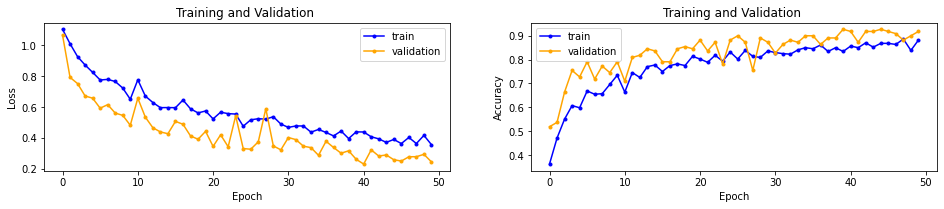

In [18]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Training and Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['loss'], color='blue', marker='.', label='train')
        plt.plot(histories['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Training and Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.show()

summarize_diagnostics_single(history.history)

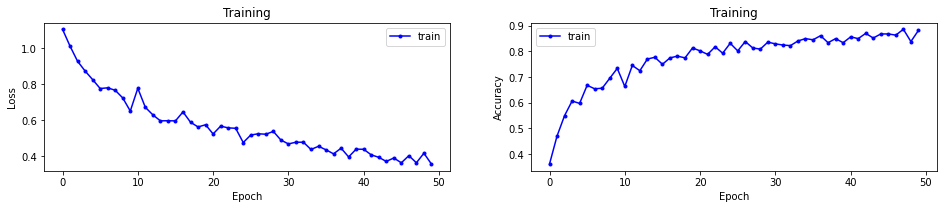

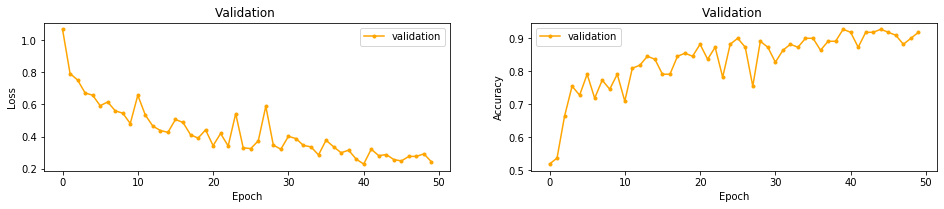

In [19]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['loss'], color='blue', marker='.', label='train')
        plt.legend(['train'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Training')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['accuracy'], color='blue', marker='.', label='train')
        plt.legend(['train'], loc='bottom right')
        plt.show()

        plt.figure(figsize=(16,6))
        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['val_accuracy'], color='orange',  marker='.', label='test')
        plt.legend(['validation'], loc='bottom right')
        plt.show()

summarize_diagnostics_single(history.history)

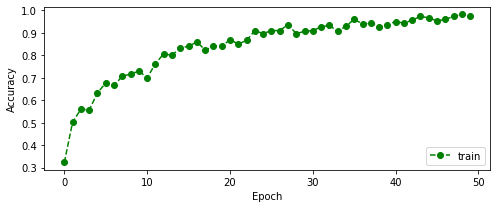

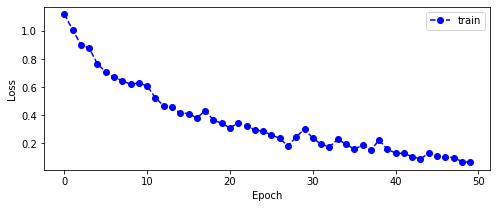

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [20]:
# 01 - Save model as h5
model.save("/content/drive/MyDrive/training50dataset80/skripsi.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/drive/MyDrive/training50dataset80/skripsi.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [21]:
# Load Model (Enter Path of Selected Model)
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/training50dataset80/skripsi.h5') # ⚠️Can be Customized⚠️
#model.summary()

In [22]:
from sklearn.preprocessing import LabelBinarizer

if "encoder" in globals(): # RAM Cleaner
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

encoder             = LabelBinarizer() # Encoding Labels (y) in different ways, for Confusion Matrix purposes
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # Try -> predict.shape -> (800, 5) -> axis = -1 it will get that value 5 (number of Orchid Labels)

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # Prediction Result Label
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # Actual Label (in Dataset)

print("Predict Label :", pred_label)
print("Actual Label  :", true_label, "\n")

loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predict Label : [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 0 2 2 2 2 2 2]
Actual Label  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

4/4 [==============================] - 2s 408ms/step - loss: 0.1972 - accuracy: 0.9091


In [23]:
model.save_weights('/content/drive/MyDrive/training50dataset80/model_plant_disease_weight.h5')

In [24]:
# save ke json

model_json = model.to_json()
with open('/content/drive/MyDrive/training50dataset80/model_plant_disease_1.json', 'w') as json_file:
    json_file.write(model_json)

Accuracy : 90.909%
Loss     : 0.197

Classification Report :

               precision    recall  f1-score   support

   daun sehat       0.94      0.82      0.88        40
 virus gemini       0.95      1.00      0.98        40
virus kerupuk       0.82      0.90      0.86        30

     accuracy                           0.91       110
    macro avg       0.90      0.91      0.90       110
 weighted avg       0.91      0.91      0.91       110



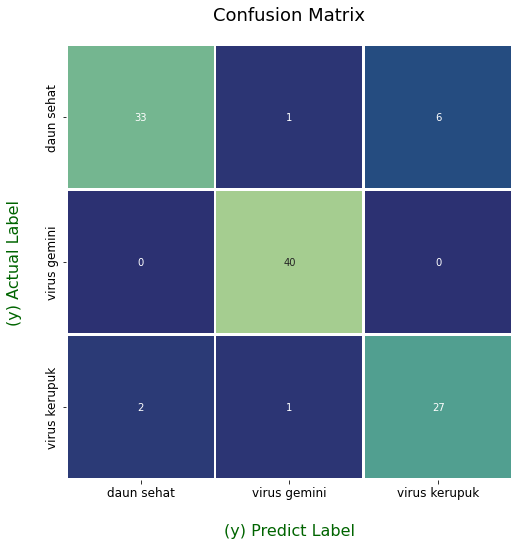

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['daun sehat', 'virus gemini', 'virus kerupuk']
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, color="darkgreen", labelpad=24)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load and Prepare the Image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an Image and Predict the Class/Label
def run_example(new_data_path):
    # Load the Image
    img = load_image(new_data_path)
    # Load Model
    model = load_model('/content/drive/MyDrive/dataku90/skripsi.h5') # ⚠️Can be Customized⚠️
    # Predict the Class/Label
    result = model.predict_classes(img) # OPTION 1
    #result = model.predict(img)        # OPTION 2
    if result[0] == 0:
        print("\nPredict Label: daun sehat")
    elif result[0] == 1:
        print("\nPredict Label: gemini virus")
    elif result[0] == 2:
        print("\nPredict Label: virus kerupuk")


Predict Label: gemini virus


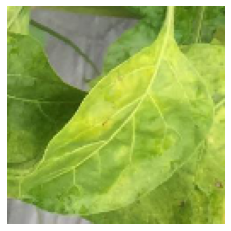

In [ ]:
# Get image data directly from the internet
#!wget -O 'new_test_data.jpg' 'https://th.bing.com/th/id/OIP.WuQn2OSNr13AiNJtR7pzugHaEL?pid=ImgDet&rs=1'

# Get image data from the dataset
new_data_path = '/content/drive/MyDrive/dataset/virus gemini/G04.JPG' # ⚠️Can be Customized⚠️
run_example(new_data_path)

In [26]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/training50dataset80/skripsi.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/training50dataset80/skripsi.tflite", "wb").write(tflite_model)

17849816

In [ ]:
# Cara 2 : Upload data baru via local PC
from google.colab import files
uploaded = files.upload()

Saving R.jfif to R.jfif


In [ ]:
# Cara 3 : Upload data baru via download langsung dari internet
!wget -O 'data_test_baru.jpg' 'https://belajartani.com/wp-content/uploads/2021/03/cucumber-mosaic-virus-CMV-pada-cabai.jpg'

--2021-12-17 19:19:20--  https://belajartani.com/wp-content/uploads/2021/03/cucumber-mosaic-virus-CMV-pada-cabai.jpg
Resolving belajartani.com (belajartani.com)... 103.7.226.172
Connecting to belajartani.com (belajartani.com)|103.7.226.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48794 (48K) [image/jpeg]
Saving to: ‘data_test_baru.jpg’

data_test_baru.jpg  100%[===================>]  47.65K   102KB/s    in 0.5s    

2021-12-17 19:19:22 (102 KB/s) - ‘data_test_baru.jpg’ saved [48794/48794]

